In [2]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
import scipy
import lalsimulation
import lal
import time
import h5py
from bilby_pe import gen_template,gen_masses,gen_par

In [3]:
fixed_vals = {'mass_1':50.0,
        'mass_2':50.0,
        'geocent_time':0.0,
        'phase':0.0,
        'ra':1.375,
        'dec':-1.2108,
        'psi':0.0,
        'theta_jn':0.0,
        'luminosity_distance':1000.0,
        'a_1':0.0,
        'a_2':0.0,
        'tilt_1':0.0,
        'tilt_2':0.0,
        'phi_12':0.0,
        'phi_jl':0.0,
        'det':['H1','L1','V1']}

injection_vals = {'mass_1':50.0,
        'mass_2':50.0,
        'geocent_time':0.0,
        'phase':0.0,
        'ra':1.375,
        'dec':-1.2108,
        'psi':0.0,
        'theta_jn':0.0,
        'luminosity_distance':1000.0,
        'a_1':0.0,
        'a_2':0.0,
        'tilt_1':0.0,
        'tilt_2':0.0,
        'phi_12':0.0,
        'phi_jl':0.0}

bounds = {'mass_1_min':35.0, 'mass_1_max':80.0,
        'mass_2_min':35.0, 'mass_2_max':80.0,
        'M_min':70.0, 'M_max':160.0,
        'geocent_time_min':0.15,'geocent_time_max':0.35,
        'phase_min':0.0, 'phase_max':2.0*np.pi,
        'ra_min':0.0, 'ra_max':2.0*np.pi,
        'dec_min':-0.5*np.pi, 'dec_max':0.5*np.pi,
        'psi_min':0.0, 'psi_max':2.0*np.pi,
        'theta_jn_min':0.0, 'theta_jn_max':np.pi,
        'a_1_min':0.0, 'a_1_max':0.0,
        'a_2_min':0.0, 'a_2_max':0.0,
        'tilt_1_min':0.0, 'tilt_1_max':0.0,
        'tilt_2_min':0.0, 'tilt_2_max':0.0,
        'phi_12_min':0.0, 'phi_12_max':0.0,
        'phi_jl_min':0.0, 'phi_jl_max':0.0,
        'luminosity_distance_min':1000.0, 'luminosity_distance_max':3000.0}

rand_pars = ['mass_1','mass_2']
inf_pars=['mass_1','mass_2']   
ref_geocent_time = 1126259642.5

In [5]:
pars = gen_par(fixed_vals,bounds=bounds,rand_pars=rand_pars,mdist='uniform')
temp = []
for p in rand_pars:
    for q,qi in pars.items():
        if p==q:
            temp.append(qi)       

Tue Nov  8 15:11:46 2022: using uniform mass and non-equal mass distribution
Tue Nov  8 15:11:46 2022: selected bbh masses = 72.1597877031744,41.10098069016847 (chirp mass = 47.04056810639004)


In [6]:
pars['geocent_time'] += ref_geocent_time
test_samples_noisefree,test_samples_noisy,injection_parameters,ifos,waveform_generator = gen_template(duration = 1.0,
                                                                                                      sampling_frequency = 1024,
                                                                                                      pars = pars,
                                                                                                      ref_geocent_time = ref_geocent_time )
snr = np.array([ifos[j].meta_data['optimal_SNR'] for j in range(len(pars['det']))])

15:11 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
15:11 bilby INFO    : Injected signal in H1:
15:11 bilby INFO    :   optimal SNR = 33.48
15:11 bilby INFO    :   matched filter SNR = 32.89+0.45j
15:11 bilby INFO    :   mass_1 = 72.1597877031744
15:11 bilby INFO    :   mass_2 = 41.10098069016847
15:11 bilby INFO    :   a_1 = 0.0
15:11 bilby INFO    :   a_2 = 0.0
15:11 bilby INFO    :   tilt_1 = 0.0
15:11 bilby INFO    :   tilt_2 = 0.0
15:11 bilby INFO    :   phi_12 = 0.0
15:11 bilby INFO    :   phi_jl = 0.0
15:11 bilby INFO    :   luminosity_distance = 1000.0
15:11 bilby INFO    :   theta_jn = 0.0
15:11 bilby INFO    :   psi = 0.0
15:11 bilby INFO    :   phase = 0.0
15:11 bilby INFO    :   geocent_time = 1126259642.5
15:11 bilby INFO    :   ra = 1.375
15:11 bilby INFO    :   dec = -1.2108
15

In [20]:
from bilby.gw.utils import noise_weighted_inner_product
from bilby.gw.detector.psd import PowerSpectralDensity

In [47]:
new_data = (test_samples_noisefree + np.random.normal(loc = 0.0, scale = 1.0, size = test_samples_noisefree.shape))

In [56]:
np.sqrt(noise_weighted_inner_product(new_data, new_data, psd, duration = 1))

ValueError: operands could not be broadcast together with shapes (3,1024) (2,513) 

In [58]:
psd = np.array(psd)
psd.shape

(2, 513)

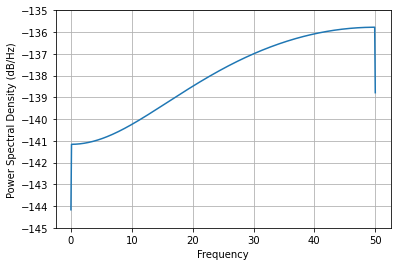

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

diff = 0.01
psd = plt.psd(np.random.normal(loc = 0.0, scale = 1.0, size = test_samples_noisefree.shape), 1024, 1 / diff)
#plt.show()